# Expected Future Lifetimes


In many insurance applications we are interested in the first and second moments not only of the future lifetime of an individual, but also of the individual's _curtate_ future lifetime, defined as the integer part of future lifetime.  For some lifetime distributions (as described in later sections), we are able to obtain the mean and variances of future lifetimes directly without using numerical integrationn techniques.

## Complete expectation of life

$\overset{\circ}{e}_{x} = E[T_x] = \int_0^{\infty} t~ _tp_x\ \mu_{x+t} dt = \int_0^{\infty}~ _tp_x\ dt$

- is the complete expectation of life, or the mean future lifetime: it can be computed either as (1) the weighted sum of lifetimes lived or (2) the sum over all years of the probabilities of living at least those years.

$E[T_x^2] = \int_0^{\infty} t^2~ _tp_x~ \mu_{x+t}\ ds = \int_0^{\infty}~ 2~ t~ _tp_x~ dt$

- second moment of future lifetime

$Var[T_x] = E[T_x^2] - (\overset{\circ}{e}_{x})^2$

- variance of future lifetime



## Curtate expectation of life

$K_x = \lfloor T_x \rfloor$
- is the curtate future lifetime random variable, representing the number of completed whole future years by (x) prior to death

$e_{x} = E[K_x] = \sum_{k=0}^{\infty} k~ _{k|}q_x~  = \sum_{k=1}^{\infty}~ _kp_x~ dt$

- Is the curtate expectation of life, or the mean curtate lifetime: it can be computed two ways intuitively similar to the approach of complete expectations.

$E[K_x^2] = \sum_{k=0}^{\infty} k^2~ _{k|}q_x~ = \sum_{k=1}^{\infty} (2k-1)~ _kq_x\ dt$

- second moment of curtate future lifetime

$Var[K_x] = E[K_x^2] - (e_{x})^2$

- variance of curtate future lifetime



## Temporary expectation of life

We are sometimes interested in the future lifetime random variable subject to a cap of n years, which is represented by the random variable $min(T_x, n)$.

$\overset{\circ}{e}_{x:\overline{n|}} = \int_0^{n} t~ _tp_x~ \mu_{x+t}~ ds + n~ _np_x = \int_0^{n}~ _tp_x~ dt$

- term complete expectation of life

$e_{x:\overline{n|}} = \sum_{k=0}^{n-1} k~ _{k|}q_x~ + n~ _np_x = \sum_{k=1}^{n}~ _kp_x$

- temporary curtate expectation of life, limited at $n$ years


## Methods

The `Lifetime` class implements methods to compute curtate and complete expectations and second moments of future lifetime

In [7]:
from actuarialmath import Lifetime
import describe
describe.methods(Lifetime)


class Lifetime - Computes expected moments of future lifetime

    Methods:
    --------

    e_x(x, s, t, curtate, moment):
      Compute curtate or complete expectations and moments of life




## Examples


The `e_x` class method computes the mean, variance or second moment (by setting the value of the argument `moment` to be 1, VARIANCE, or 2 respectively) of either the complete or curtate future lifetime (by setting the value of the argument `curtate` to be False or True respectively).

In [8]:
life = Lifetime().set_survival(mu=lambda *args: 0.1)
print(life.e_x(x=50, curtate=False), life.e_x(x=50, moment=life.VARIANCE, curtate=False))
print(life.e_x(x=50, curtate=True), life.e_x(x=50, moment=life.VARIANCE, curtate=True))


9.999999999999998 99.99999999999997
9.508331944775032 99.91670831680462


Limited future lifetimes are specified by the argument `t`. The example below plots the expected limited curtate lifetimes by varying age $x$ and lifetime limit $t$.

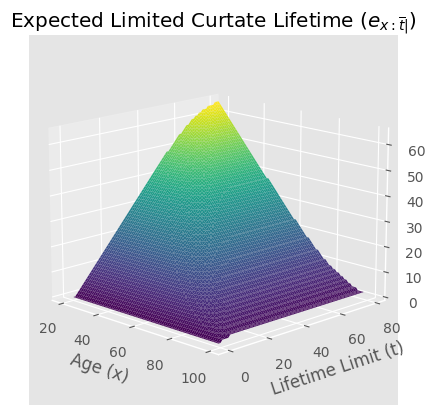

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt

def S(x, s, t):  # define a survival function
    return math.exp(-.00022*t - (.0000027*1.124**(x+s)*(1.124**t-1))/math.log(1.124))
life = Lifetime().set_survival(S=S, minage=20, maxage=130)

X, Y = np.meshgrid(np.arange(20, 100, 1), np.arange(0, 80, 1))
Z = np.zeros_like(X)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = life.e_x(x=X[i][j], t=Y[i][j])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor=None)
ax.set_xlabel('Age (x)')
ax.set_ylabel('Lifetime Limit (t)')
ax.set_title('Expected Limited Curtate Lifetime ($e_{x:\overline{t}|}$)')
ax.view_init(15, -45)

In [49]:
Y


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [57, 57, 57, ..., 57, 57, 57],
       [58, 58, 58, ..., 58, 58, 58],
       [59, 59, 59, ..., 59, 59, 59]])

__AMLCR Exericse 2.1__

Let $F_0(t) = 1 - (1 - t /105)^{1/5}$ for $0 \le t \le 105$. Calculate

(a) the probability that a newborn life dies before age 60 [0.1559]

(b) the probability that a life aged 30 survives to at least age 70 [0/8586]

(c) the probability that a life aged 20 dies between ages 90 and 100 [0.1394]

(d) the force of mortality at age 50 [0.0036]

(e) the median future lifetime at age 50 [53.28]

(f) the complete expectation of life at age 50 [45.83]

(g) the curtate expectation of life at age 50 [45.18]

In [68]:
def F(t): return (1 - (1 - t/105)**(1/5) if t <= 105 else 1)
life = Lifetime().set_survival(S=lambda x,s,t: (1-F(x+s+t)) / (1-F(x+s)))
print("(a)", life.q_x(x=0, t=60))
print("(b)", life.p_x(x=30, t=70-30))
print("(c)", life.q_x(x=20, u=90-20, t=100-90))
print("(d)", life.mu_x(x=50))
print("(e)", life.solve(fun=lambda t: life.p_x(x=50, t=t), target=0.5, grid=105/2))
print("(f)", life.e_x(x=50, curtate=False))
print("(g)", life.e_x(x=50))

(a) 0.1558791201558899
(b) 0.8586207034844889
(c) 0.13943444007155992
(d) 0.003636764417087519
(e) 53.28125000000001
(f) 45.833333325511866
(g) 45.17675143564247


__SOA Question 2.1__

You are given:

- $S0(t) = \left(1 - \frac{t}{\omega} \right)^{\frac{1}{4}}, \quad 0 \le t \le \omega$

- $\mu_{65} = \frac{1}{180} $

Calculate $e_{106}$, the curtate expectation of life at age 106.

In [62]:
print("SOA Question 2.1: (B) 2.5")
def fun(omega):  # Solve first for omega, given mu_65 = 1/180
    return Lifetime().set_survival(l=lambda x,s: (1 - (x+s)/omega)**0.25,
                                   maxage=omega)\
                     .mu_x(65)
omega = int(Lifetime.solve(fun, target=1/180, grid=100))  # solve for omega
e = Lifetime().set_survival(l=lambda x,s: (1 - (x+s)/omega)**0.25, 
                               maxage=omega).e_x(106)
print(e)

SOA Question 2.1: (B) 2.5
2.4786080555423604


__SOA Question 2.4__

You are given $_tq_0 = \frac{t^2}{10,000} \quad 0 < t < 100$. Calculate 
$\overset{\circ}{e}_{75:\overline{10|}}$.

In [69]:
print("SOA Question 2.4: (E) 8.2")
def q(t) : return (t**2)/10000. if t < 100 else 1.
e = Lifetime().set_survival(l=lambda x,s: 1 - q(x+s))\
              .e_x(75, t=10, curtate=False)
print(e)

SOA Question 2.4: (E) 8.2
8.20952380952381
